# How to Plot Learning Curve and Confusion Matrix in TensorFlow 2.0

!pip install tensorflow==2.0.0-rc0

!pip install tensorflow-gpu==2.0.0-rc0

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

print(tf.__version__)

2.0.0-rc0


## Import the Fashion MNIST dataset

In [2]:
mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [5]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [6]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Train the model

In [7]:
history = model.fit(X_train, y_train, epochs= 10, batch_size= 100, validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 107us/sample - loss: 0.5631 - accuracy: 0.8055 - val_loss: 0.4734 - val_accuracy: 0.8365
Epoch 2/10
48000/48000 [==============================] - 3s 66us/sample - loss: 0.4137 - accuracy: 0.8542 - val_loss: 0.4210 - val_accuracy: 0.8517
Epoch 3/10
48000/48000 [==============================] - 3s 65us/sample - loss: 0.3742 - accuracy: 0.8692 - val_loss: 0.3972 - val_accuracy: 0.8586
Epoch 4/10
48000/48000 [==============================] - 3s 60us/sample - loss: 0.3475 - accuracy: 0.8759 - val_loss: 0.3611 - val_accuracy: 0.8712
Epoch 5/10
48000/48000 [==============================] - 3s 65us/sample - loss: 0.3270 - accuracy: 0.8823 - val_loss: 0.3563 - val_accuracy: 0.8711
Epoch 6/10
48000/48000 [==============================] - 2s 50us/sample - loss: 0.3097 - accuracy: 0.8879 - val_loss: 0.3379 - val_accuracy: 0.8777
Epoch 7/10
48000/48000 [==============================]

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

0.8741

## Plotting Learning Curve and Confusion Matrix in TensorFlow 2.0

##### Detailed video is available here: https://youtu.be/SToqP9V9y7Q 

pip install mlxtend  ->  http://rasbt.github.io/mlxtend/installation/

In [17]:
history.history

{'loss': [0.5630651847148935,
  0.413695301177601,
  0.3741717710159719,
  0.3475389248070618,
  0.3270470625410477,
  0.3096521354280412,
  0.2948853111825883,
  0.2840539335583647,
  0.27463992168195545,
  0.26365199241166315],
 'accuracy': [0.8055,
  0.85420835,
  0.86925,
  0.8758542,
  0.8822708,
  0.8879167,
  0.8926875,
  0.89575,
  0.9003125,
  0.90425],
 'val_loss': [0.47336506297190983,
  0.42104757962127526,
  0.39718655596176783,
  0.36111523682872454,
  0.356258549913764,
  0.33785376759866875,
  0.337011135990421,
  0.33619634645680585,
  0.3258006428678831,
  0.3239471256732941],
 'val_accuracy': [0.8365,
  0.8516667,
  0.85858333,
  0.87116665,
  0.8710833,
  0.87766665,
  0.87925,
  0.87775,
  0.8845,
  0.8845]}

In [18]:
import matplotlib.pyplot as plt

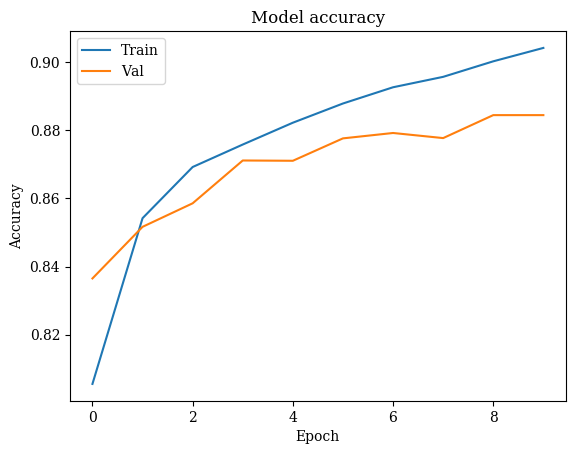

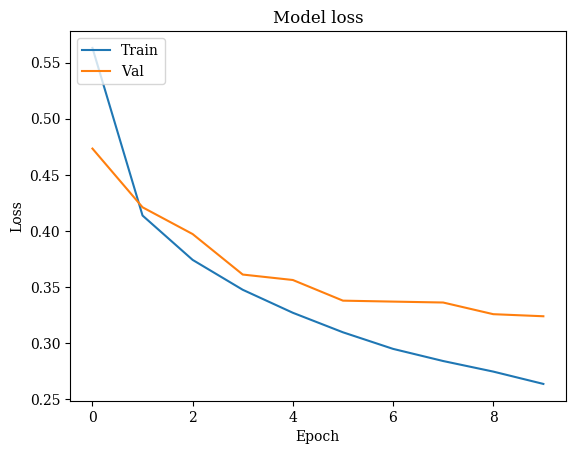

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [20]:
# !pip install mlxtend

In [21]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

In [22]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

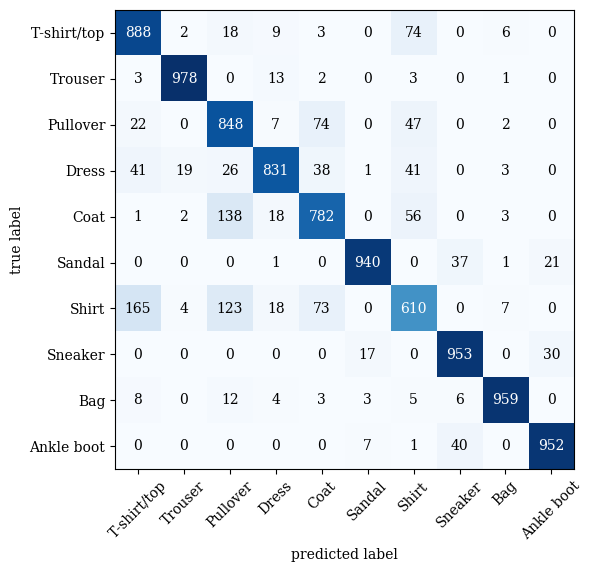

In [24]:
plt.rc('font',family='Serif')

mat = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(6, 6), class_names = class_names, show_normed=False)
plt.tight_layout()
fig.savefig('confusion_matrix_test.png')